In [1]:
# import third-party packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# import functions.py module
import functions as fs

In [2]:
# define the symbol and the interval of time series
ticker = "BTC-USD"
start_date = "2013-01-01"
end_date = "2023-01-01"

# retrieve daily, weekly, monthly
#  and quarterly historical data from yahoo finance
day_data = fs.yahoodata(ticker=ticker,
                        period1=start_date,
                        period2=end_date,
                        interval="1d").getdata()
week_data = fs.yahoodata(ticker=ticker,
                        period1=start_date,
                        period2=end_date,
                        interval="1wk").getdata()
month_data = fs.yahoodata(ticker=ticker,
                        period1=start_date,
                        period2=end_date,
                        interval="1mo").getdata()
quarter_data = fs.yahoodata(ticker=ticker,
                        period1=start_date,
                        period2=end_date,
                        interval="3mo").getdata()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# collecting all the data in a dictionary
intervals = ["Daily", "Weekly", "Monthly", "Quarterly"]
close_data = [day_data["Close"], week_data["Close"], month_data["Close"], quarter_data["Close"]]
data_base = dict(zip(intervals, close_data))
data_base


{'Daily': Date
 2014-09-17      457.334015
 2014-09-18      424.440002
 2014-09-19      394.795990
 2014-09-20      408.903992
 2014-09-21      398.821014
                   ...     
 2022-12-27    16717.173828
 2022-12-28    16552.572266
 2022-12-29    16642.341797
 2022-12-30    16602.585938
 2022-12-31    16547.496094
 Name: Close, Length: 3028, dtype: float64,
 'Weekly': Date
 2014-09-15      398.821014
 2014-09-22      377.181000
 2014-09-29      320.510010
 2014-10-06      378.549011
 2014-10-13      389.545990
                   ...     
 2022-11-28    17130.486328
 2022-12-05    17104.193359
 2022-12-12    16757.976562
 2022-12-19    16841.986328
 2022-12-26    16625.080078
 Name: Close, Length: 433, dtype: float64,
 'Monthly': Date
 2014-10-01      338.321014
 2014-11-01      378.046997
 2014-12-01      320.192993
 2015-01-01      217.464005
 2015-02-01      254.263000
                   ...     
 2022-08-01    20049.763672
 2022-09-01    19431.789062
 2022-10-01    20495.7734

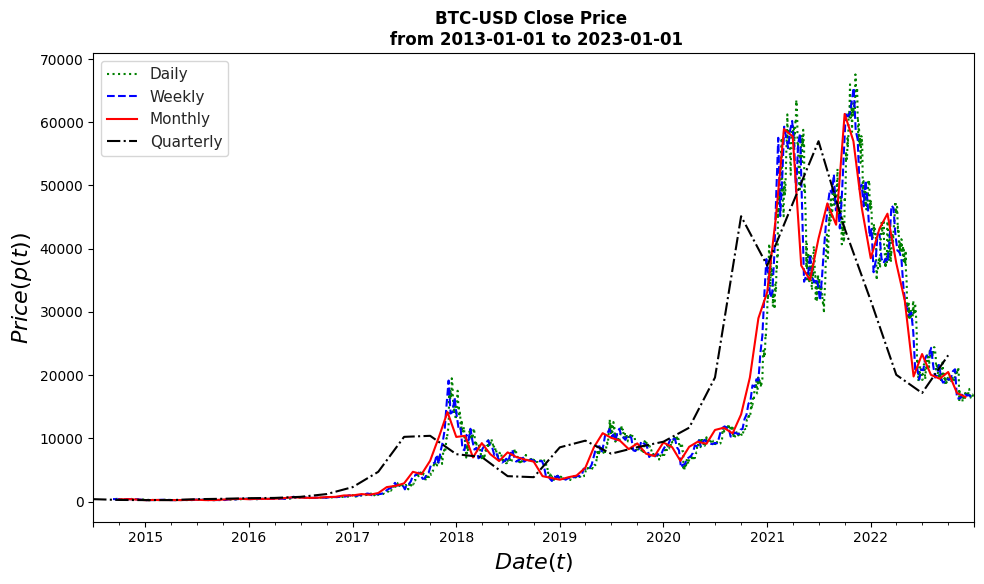

In [4]:
# initial plot of price history in multiple time frames
fig = plt.figure(figsize=(10,6))
for (interval, price), linestyle, color in zip(data_base.items(), [":", "--", "-", "-."], ["green", "blue", "red", "black"]):
    price.plot(y="Close", label=interval, color=color, figsize=(10,6), linestyle=linestyle)
plt.xlabel(xlabel="$Date (t)$", fontweight="bold", style="italic", fontsize = 16)
plt.ylabel(ylabel="$Price (p(t))$", fontweight="bold", style="italic", fontsize = 16)
plt.title(f"{ticker} Close Price \n from {start_date} to {end_date}", fontweight="bold")
sns.set(style="whitegrid")
plt.legend()
plt.tight_layout()
plt.savefig("results/BTC_timeseries.jpg")
plt.show();

In [5]:
# calculate the rate of returns and collect them into a dictionary
returns = [fs.log_returns(price) for _,price in data_base.items()]
returns = dict(zip(data_base.keys(), returns))
returns

{'Daily': Date
 2014-09-17         NaN
 2014-09-18   -0.074643
 2014-09-19   -0.072402
 2014-09-20    0.035111
 2014-09-21   -0.024968
                 ...   
 2022-12-27   -0.012048
 2022-12-28   -0.009895
 2022-12-29    0.005409
 2022-12-30   -0.002392
 2022-12-31   -0.003324
 Name: Close, Length: 3028, dtype: float64,
 'Weekly': Date
 2014-09-15         NaN
 2014-09-22   -0.055788
 2014-09-29   -0.162812
 2014-10-06    0.166432
 2014-10-13    0.028636
                 ...   
 2022-11-28    0.040861
 2022-12-05   -0.001536
 2022-12-12   -0.020449
 2022-12-19    0.005001
 2022-12-26   -0.012963
 Name: Close, Length: 433, dtype: float64,
 'Monthly': Date
 2014-10-01         NaN
 2014-11-01    0.111023
 2014-12-01   -0.166095
 2015-01-01   -0.386891
 2015-02-01    0.156336
                 ...   
 2022-08-01   -0.151818
 2022-09-01   -0.031307
 2022-10-01    0.053308
 2022-11-01   -0.177139
 2022-12-01   -0.036845
 Name: Close, Length: 99, dtype: float64,
 'Quarterly': Date
 2014-09-01 

<Figure size 640x480 with 0 Axes>

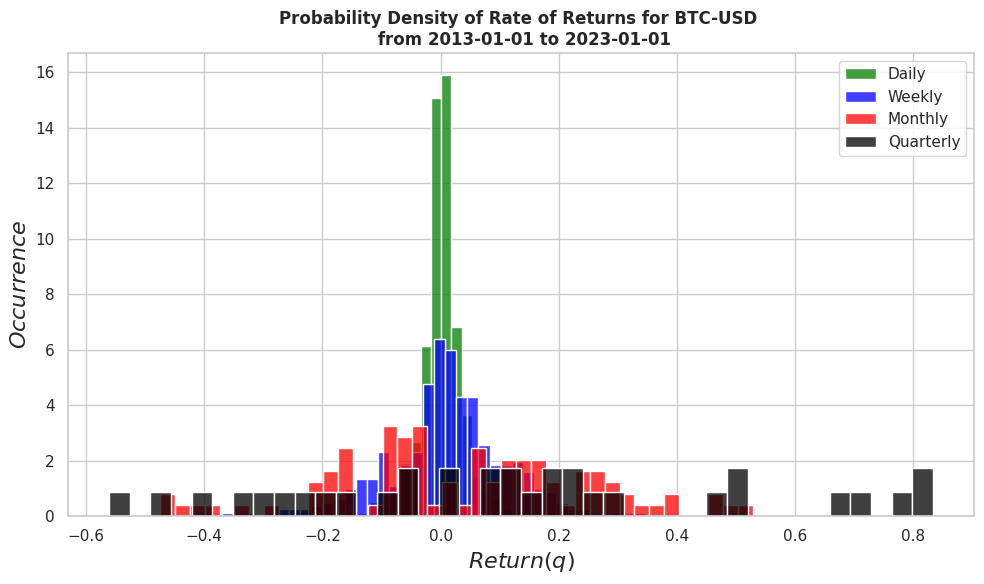

In [6]:
# initial histograms of returns
plt.cla()
plt.clf()
fig = plt.figure(figsize = (10,6))

for interval, color in zip(intervals,["green", "blue", "red", "black"]):
    sns.histplot(returns[interval], stat="density", label=interval, color=color, bins=40, edgecolor='white')

plt.xlabel(xlabel="$Return(q)$", fontweight="bold", style="italic", fontsize = 16)
plt.ylabel(ylabel="$Occurrence$", fontweight="bold", style="italic", fontsize = 16)
plt.title(f"Probability Density of Rate of Returns for {ticker} \n from {start_date} to {end_date}", fontweight="bold")
sns.set(style="whitegrid")
plt.legend()
plt.tight_layout()
plt.savefig("results/histograms.jpg")
plt.show();

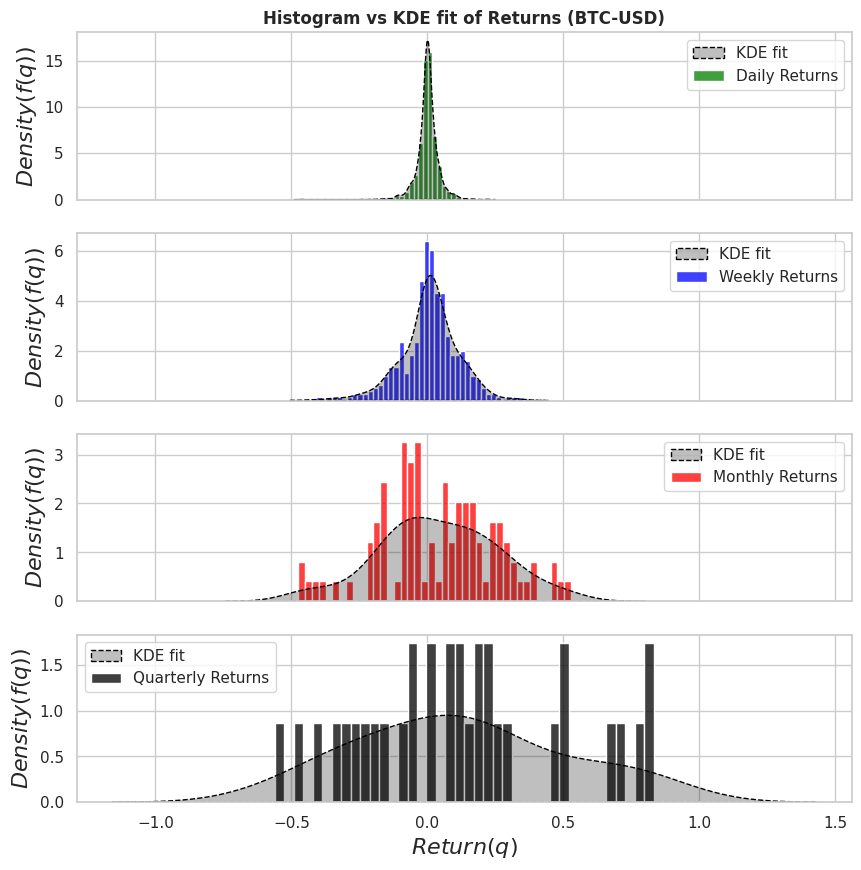

In [7]:
# histogram vs kde
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10), sharex=True)
grid_size = 1000
axes[0].set_title("Histogram vs KDE fit of Returns ({})".format(ticker), fontweight="bold")
for interval, linestyle, color, ax in zip(intervals, [":", "--", "-", "-."], ["green", "blue", "red", "black"], axes):
    sns.histplot(returns[interval], ax=ax, stat="density", label=interval + ' Returns', color=color, bins=40, edgecolor='white')
    sns.kdeplot(returns[interval], ax=ax, color="black", common_norm=True, bw_method="silverman", gridsize=grid_size, linestyle="--", linewidth=1, label="KDE fit", fill=True)
    ax.set_ylabel(ylabel="$Density(f(q))$", fontweight="bold", style="italic", fontsize = 16)
    ax.legend()

ax.set_xlabel(xlabel="$Return(q)$", fontweight="bold", style="italic", fontsize = 16)
sns.set(style="whitegrid")
plt.savefig("results/histVSkde.jpg")
plt.show()

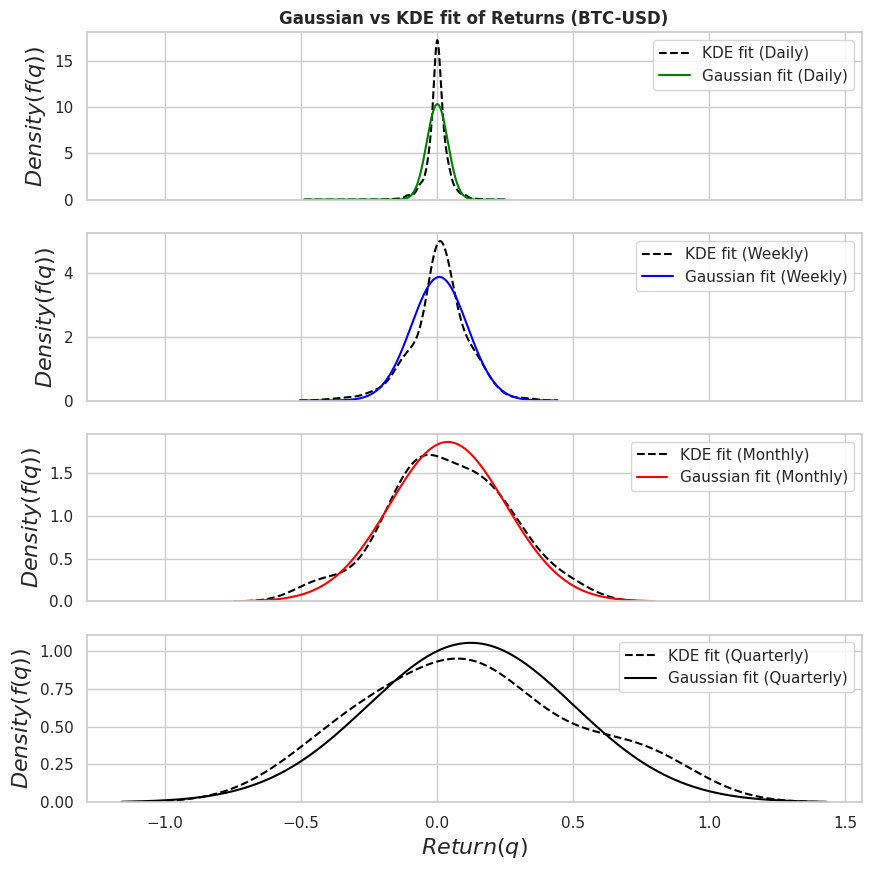

In [18]:
# kde vs gaussian fits
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10), sharex=True)
grid_size = 1000
axes[0].set_title("Gaussian vs KDE fit of Returns ({})".format(ticker), fontweight="bold")

for interval, color, ax in zip(intervals, ["green", "blue", "red", "black"], axes):
    # using fs.density_function to create uniform data from histograms
    PDF = fs.density_function(returns[interval], size=grid_size,
                              common_norm=False, color='black',
                              clf=False, ax=ax, linestyle='--',
                              label=f'KDE fit ({interval})')
    
    # plug the uniform return values into a gaussian function
    GDF = fs.gaussian_fit(returns=returns[interval], reph_returns=PDF["Rephurbished Returns"])

    sns.lineplot(x=PDF["Rephurbished Returns"], y=GDF, ax=ax,
                 color=color, label=f'Gaussian fit ({interval})', linestyle='-')
    ax.set_ylabel(ylabel="$Density(f(q))$", fontweight="bold", style="italic", fontsize = 16)
    ax.legend()

ax.set_xlabel(xlabel="$Return(q)$", fontweight="bold", style="italic", fontsize = 16)
sns.set(style="whitegrid")
plt.savefig("results/kdeVSgaussian.jpg")
plt.show();

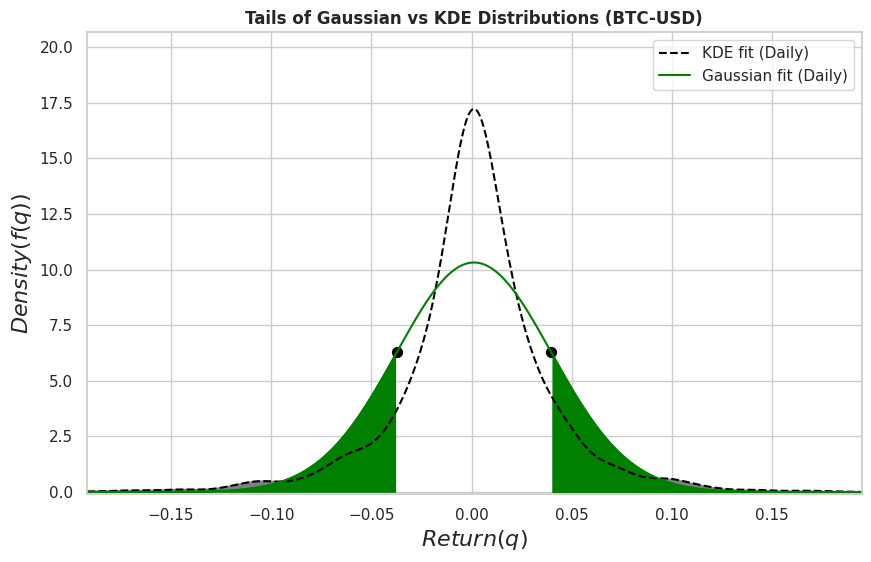

In [9]:
fs.tails_graph(ticker=ticker, returns=returns, interval="Daily", grid_size=1000)

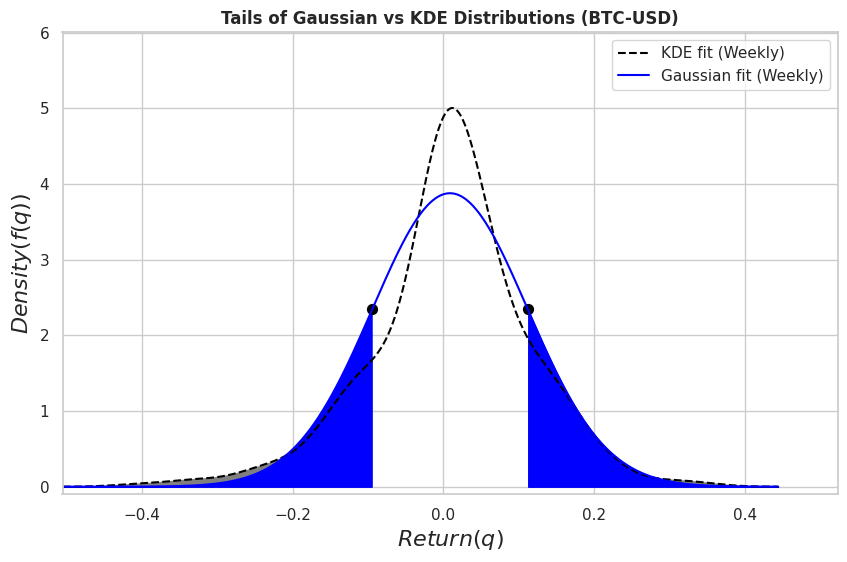

In [10]:
fs.tails_graph(ticker=ticker, returns=returns, interval="Weekly", grid_size=1000, c2='blue')

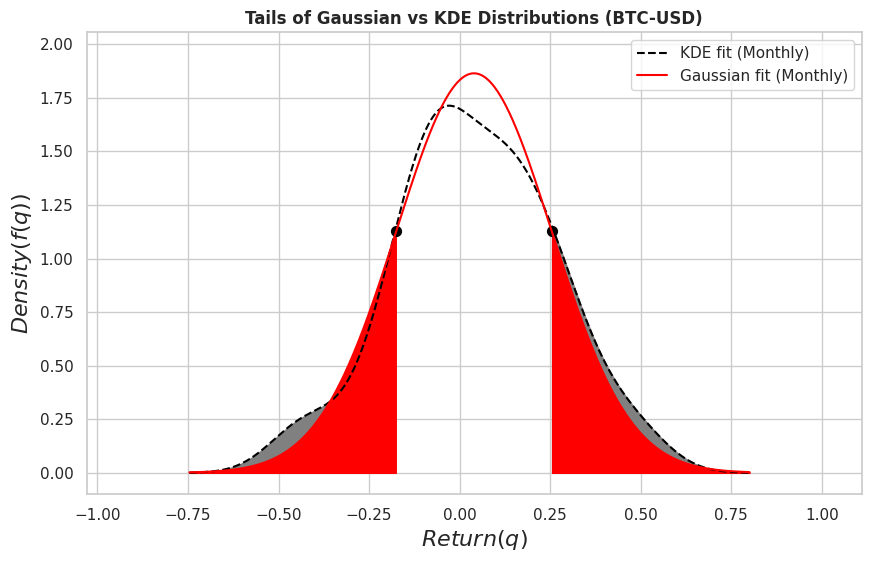

In [11]:
fs.tails_graph(ticker=ticker, returns=returns, interval="Monthly", grid_size=1000, c2='red')

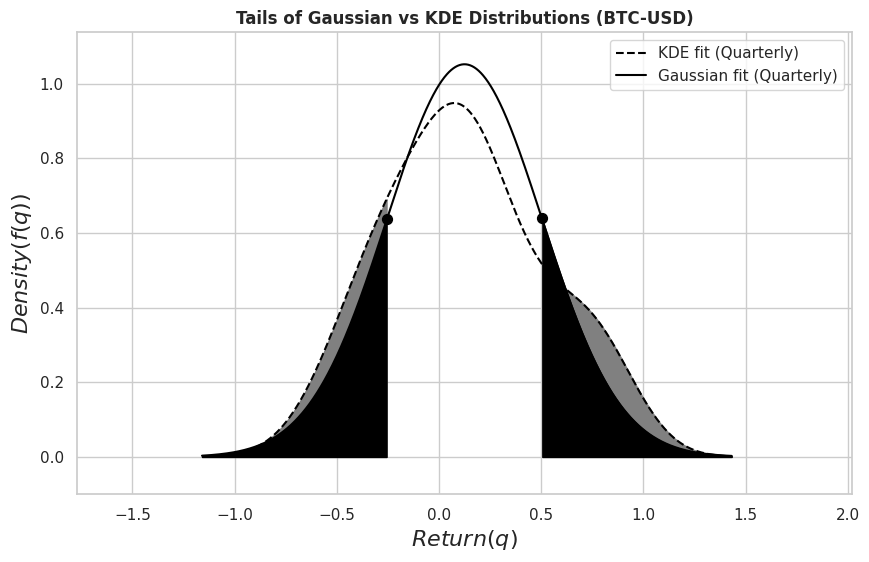

In [12]:
fs.tails_graph(ticker=ticker, returns=returns, interval="Quarterly", grid_size=1000, c2='black')

In [19]:
# calculate area under the curve of PDF and GDF in ranges [:R1] and [R3:]
# then subtract the area for GDF from PDF to get the difference in tails
tails_df = pd.DataFrame([fs.tails(Return=returns[interval], grid_size=grid_size) for interval in intervals],
                        index=intervals, columns=["Tails"])
tails_df

,Tails
Daily,-0.096451
Weekly,-0.017819
Monthly,0.032312
Quarterly,0.076623


<Figure size 640x480 with 0 Axes>

In [14]:
# define a couple of statistical features to compare with tails' trend
features = pd.DataFrame([[returns[interval].mean() for interval in intervals],
                      [returns[interval].std() for interval in intervals],
                      [returns[interval].skew() for interval in intervals],
                      [returns[interval].kurt() for interval in intervals]],
                        index=intervals,
                        columns=["Mean", "Standard Deviation", "Skewness", "Kurtosis"])
features

<Figure size 640x480 with 0 Axes>

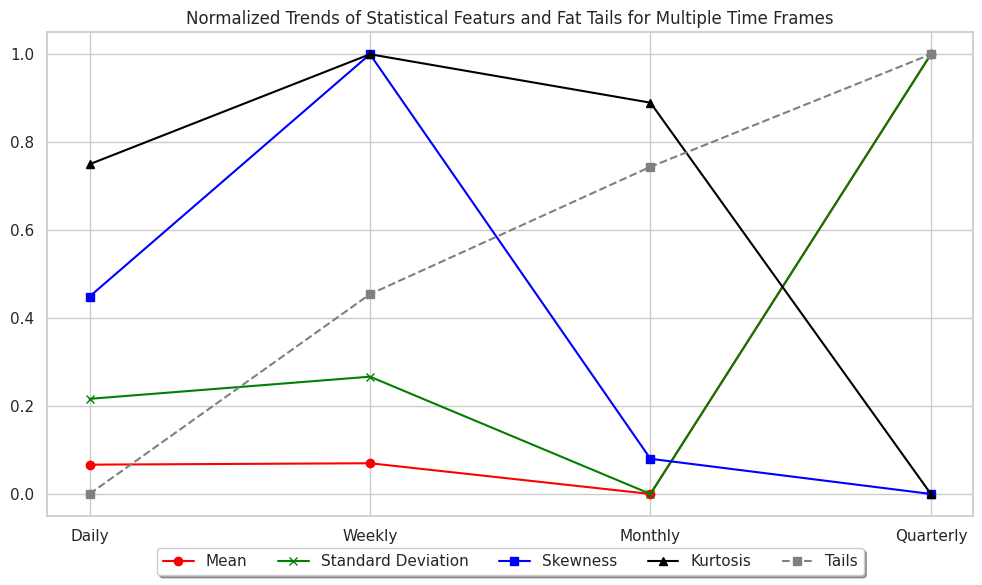

In [20]:
# compare normalized trends of features with tails across time frames
plt.cla()
plt.clf()
fig = plt.figure(figsize=(10, 6))
for feature, color, marker in zip(features, ['red', 'green', 'blue', 'black'], ['o', 'x', 's', '^']):
    plt.plot(MinMaxScaler().fit_transform(features[feature].to_numpy().reshape(-1,1)).squeeze(),
             label=feature, ls="-", ms=6, marker=marker, color=color)

plt.plot(tails_df.index,
         MinMaxScaler().fit_transform(tails_df["Tails"].to_numpy().reshape(-1,1)).squeeze(),
         label = "Tails", ls="--", ms=6, marker = "s", color = "grey")
plt.title("Normalized Trends of Statistical Featurs and Fat Tails for Multiple Time Frames")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
sns.set(style="whitegrid")
plt.tight_layout()
plt.savefig("results/features&tails.jpg")
plt.show();

In [21]:
# calculate the correlation matrix for features and tails
corrMatrix3 = pd.DataFrame({"Gaussian/KDE Tails Difference" : 
                            MinMaxScaler().fit_transform(tails_df["Tails"].to_numpy().reshape(-1,1)).squeeze(),
                           "Mean" : MinMaxScaler().fit_transform(features["Mean"].to_numpy().reshape(-1,1)).squeeze(),
                           "Standard Deviation" : MinMaxScaler().fit_transform(features["Standard Deviation"].to_numpy().reshape(-1,1)).squeeze(),
                           "Skewness" : MinMaxScaler().fit_transform(features["Skewness"].to_numpy().reshape(-1,1)).squeeze(),
                           "Kurtosis" : MinMaxScaler().fit_transform(features["Kurtosis"].to_numpy().reshape(-1,1)).squeeze()})

corrMatrix3.corr()

,Gaussian/KDE Tails Difference,Mean,Standard Deviation,Skewness,Kurtosis
Gaussian/KDE Tails Difference,1.000000,0.661573,0.546811,-0.556427,-0.575301
Mean,0.661573,1.000000,0.979546,-0.511457,-0.972189
Standard Deviation,0.546811,0.979546,1.000000,-0.341079,-0.932290
Skewness,-0.556427,-0.511457,-0.341079,1.000000,0.645574
Kurtosis,-0.575301,-0.972189,-0.932290,0.645574,1.000000


In [22]:
################### THE END! ###################